# Lab 4 : Using Sci-kit Learn for ML Models

# **Evaluation Metrics**

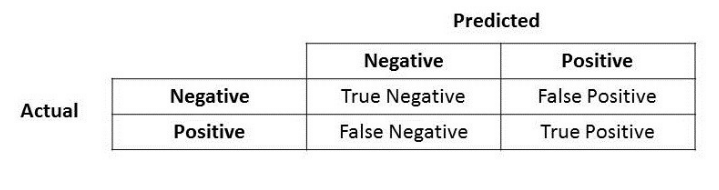

This is a confusion Matrix

### Intuition

Precision is the metric to understand *how precise your positive predictions are*. 

Recall is the metric to understand *how good you find all the actual positives*. 

Let's take an example: 
Consider you are building a COVID-19 detection system,

> If the system is predicting almost all patients as COVID positive then we can say that the recall of the model is very well, basically model is able to identify almost all the positive cases. But the precision of the model isn't well as the model is not precise in predicting the positive cases, as there are way too many false positives. 

> If the system is not able to identify all the positive cases but whatever cases the system identifies it is with absolute certainity that the cases identified are COVID positive (essentially there are no false positives). For such a model we can say that precision of the model is really good as it is able to identify the positives with great precision. But the recall of the model isn't well as many positive cases were not identified by the model.

### Precision

**Precision** is a metric which measures **how much of the model returns is true**

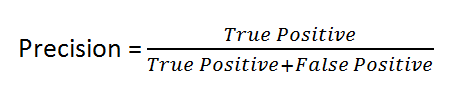

This is the formula for precision. The denominator is actually the Total Predicted Positive!

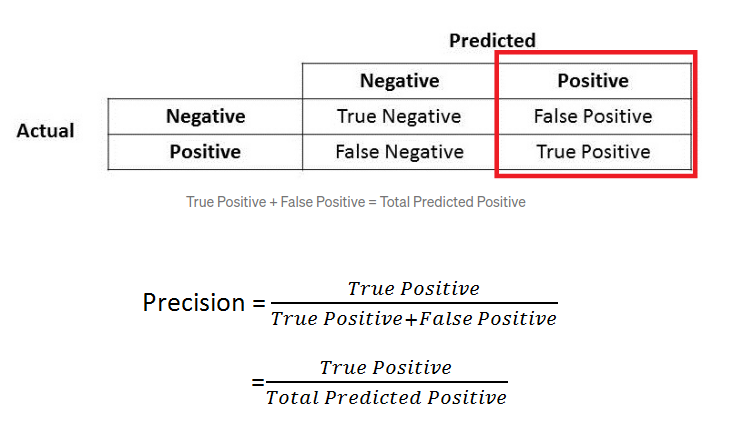

### Recall

**Recall** is a metric which measures: how much of the true labels in ground truth is the recall able to return.

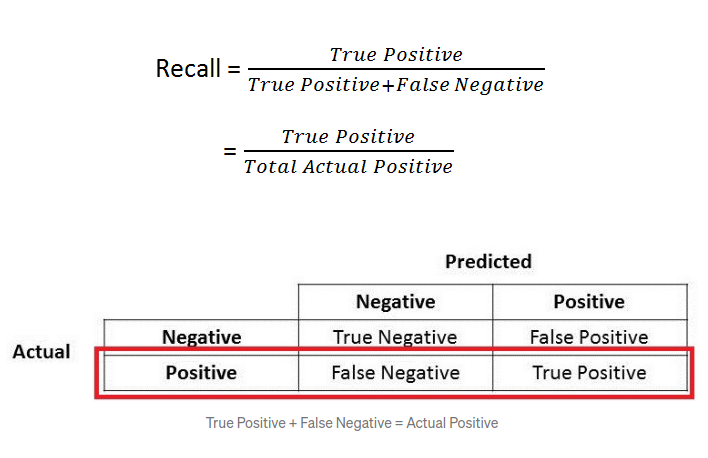

### F1 Score

F1 Score is the Harmonic Mean of Precision and Recall

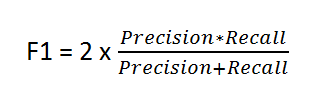

## Linear Regression

In [ ]:
import pandas as pd
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score

In [ ]:
with open("./tifr_nmr_happy.dict", "rb") as infile:
  d = pkl.load(infile)

In [ ]:
df = pd.DataFrame(d)
df

,TIFR,NMR Shift DB,Difference,sum(difference)
0,"[162.0491, 161.3475, 161.0382, 158.4733, 154.5...","[22.2, 22.8, 23.4, 25.0, 29.7, 120.9, 133.0]","[-139.84910000000002, -138.54749999999999, -13...",-523.9672
1,"[171.1807, 160.2275, 157.3161, 148.9668, 12.6713]","[13.79, 22.38, 27.73, 35.72, 176.82]","[-157.3907, -137.8475, -129.58610000000002, -1...",-373.9224
2,"[173.85, 156.8061, 150.4256, 35.8425, 23.6577,...","[10.1, 26.5, 34.2, 141.8, 158.0, 209.5]","[-163.75, -130.3061, -116.2256, 105.9575000000...",63.6910
3,"[171.0491, 170.8182, 159.3288, 154.9741, 153.1...","[11.09, 14.12, 23.19, 23.43, 29.24, 30.23, 42....","[-159.9591, -156.69819999999999, -136.1388, -1...",-975.0198
4,"[174.2345, 161.2044, 127.9901, 117.4631, 12.2528]","[10.2, 21.3, 54.3, 67.1, 169.4]","[-164.0345, -139.90439999999998, -73.6901, -50...",-270.8449
...,...,...,...,...
830,"[171.2712, 164.5356, 163.8315, 151.26, 116.570...","[13.93, 18.87, 19.35, 31.8, 66.41, 71.24, 76.55]","[-157.3412, -145.66559999999998, -144.4815, -1...",-688.9551
831,"[164.9181, 135.2674, 115.4602, 25.5234]","[20.8, 48.8, 71.9, 160.0]","[-144.1181, -86.46740000000001, -43.5601999999...",-139.6691
832,"[171.1824, 164.7424, 127.5306, 114.0168, 109.9...","[16.59, 21.22, 59.09, 69.3, 75.11, 170.49]","[-154.5924, -143.5224, -68.4406, -44.716800000...",-287.4448
833,"[50.8899, 50.8898, 29.8435]","[132.0, 132.0, 153.7]","[81.1101, 81.11019999999999, 123.85649999999998]",286.0768


In [ ]:
def lin_example(x,y):


  lin_regression = LinearRegression()
  x = np.array(x)
  x = x[:, None]
  y = np.array(y)
  y = y[:, None]

  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state=0)
  lin_regression.fit(X_train, y_train)

  lin_y_pred_1 = lin_regression.predict(X_test)


  fig = plt.figure(figsize=(10,5))
  xlabel = 'NMR Tensor Values'
  ylabel = 'NMR Shift Values'
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(color='k', linestyle=':', linewidth=1)
  plt.plot(X_test, lin_y_pred_1, '--b')
  plt.plot(X_test, y_test, "xr")
  plt.legend(["Learnt linear model","Test dataset"])
  plt.show()

  return lin_regression

In [ ]:
tensors, shifts = [], []
for idx, row in df.iterrows():
  tensors = tensors + row["TIFR"]
  shifts = shifts + row["NMR Shift DB"]

In [ ]:
assert len(tensors) == len(shifts), "The lengths don't match"

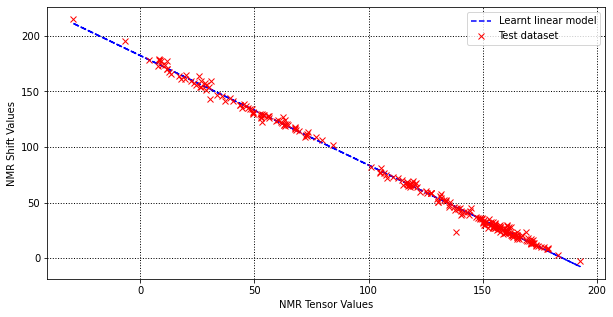

In [ ]:
model = lin_example(tensors, shifts)

## Decision Trees

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset

`For more comprehensive set of labs for decision trees and SVMs, 
visit : https://github.com/Foundations-in-Modern-Machine-Learning/course-contents/tree/main/Classification2`

Code for the core experiment:
Creating the decision tree classifier based on parameters passed.
Evaluating the classifier's accuracy and plotting its confusion matrix.
Plotting its decision boundary.
Creating and showing the visualization of the tree made.


In [ ]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
from sklearn import svm
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression


In [ ]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1, binary=False):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("The confusion matrix is : ")
  plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names)

  if binary:
    print("Recall is:")
    print(recall_score(y_test, y_pred))

    print("Precision is:")
    print(precision_score(y_test, y_pred))

    print("F1 Score is:")
    print(f1_score(y_test, y_pred))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


The confusion matrix is : 
Here is a diagram of the tree created to evaluate each sample:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


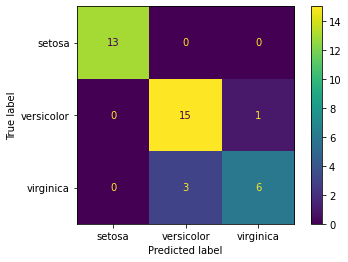

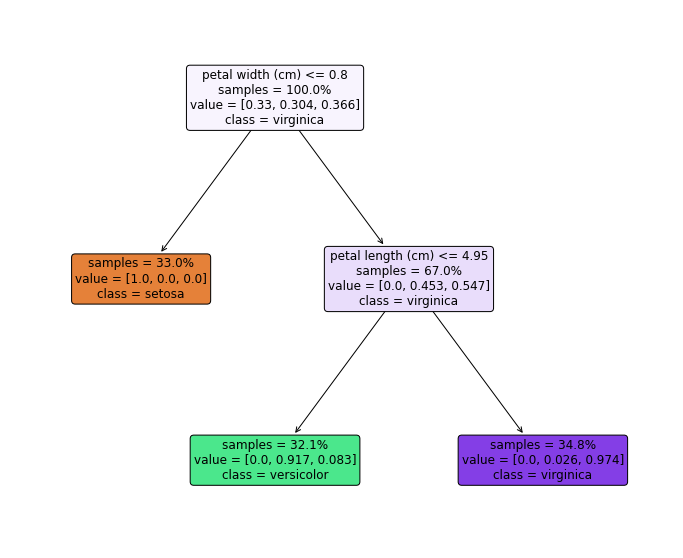

In [ ]:
giveAnExample(2)

### Exercise 1:
 Kindly use the above tree to evaluate the classes for the following examples and verify what percent of them are classified correctly by the tree:

In [ ]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


Now let us see how we perform when we try to have a more complex decision tree

Accuracy of the decision tree on the test set: 

0.974


The confusion matrix is : 
Here is a diagram of the tree created to evaluate each sample:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


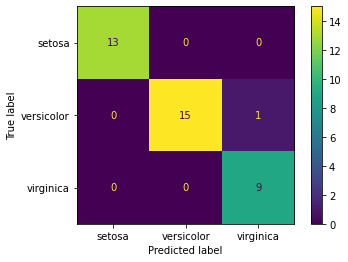

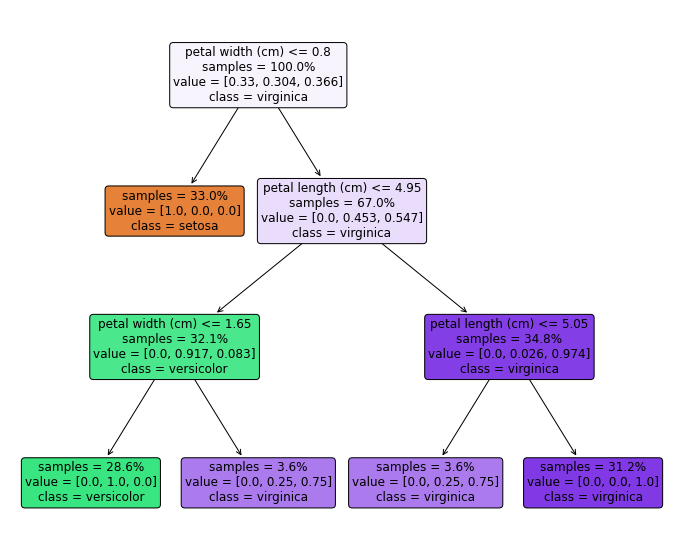

In [ ]:
giveAnExample(3)

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely petal length and petal width are used

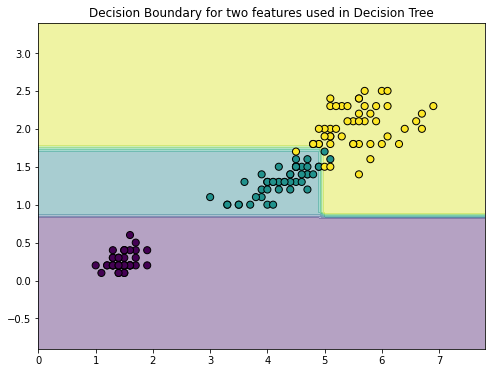

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

### Exercise 2:

#### 2.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and then pause and ponder.

Test with `max_depth` of the following values:
- 2
- 5
- 10


What do you observe?

#### 2.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

---

### Exercise 3:

### Exercise 3:

Now let's, build a decision tree to predict is a molecule is toxic or not. We have provided a dataset 'her_mol_descriptors.csv' which has several features like Molecular Weight, Number of Valence Electrons, Number of Heavy Atoms, Number of romatic Rings, Number of H donors, etc. The dataset has a binary label which specifies if a molecule is toxic or not (1 represnts molecule is toxic while 0 represents that the molecule is not toxic). 


1.   First Upload the dataset file and load the file into a pandas Dataframe.
2.   Split the Dataset into x_train, x_test, y_train, y_test.
3.   Train a Decision tree model on Train set. 
4.   Use this model to predict if molecule a belonging to test set is toxic or not.
5.   Evaluate the predctions. (Use the evaluation metrics taught above) 


After building the decicion tree try to gain chemical intuition from the features used in the decision nodes.

In [ ]:
f = pd.read_csv("herg_mol_descriptors.csv")
f = f[~pd.isnull(f).any(axis=1)]

In [ ]:
X_tox = np.array(f[f.columns[1:-1]])
y_tox = np.array(f[f.columns[-1]])

X_train, X_test, y_train, y_test = train_test_split(X_tox, y_tox, test_size=0.1, random_state=0)

Accuracy of the decision tree on the test set: 

0.797


The confusion matrix is : 
Recall is:
0.9743589743589743
Precision is:
0.7755102040816326
F1 Score is:
0.8636363636363635
Here is a diagram of the tree created to evaluate each sample:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


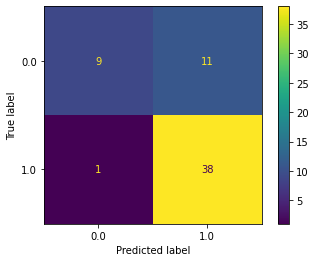

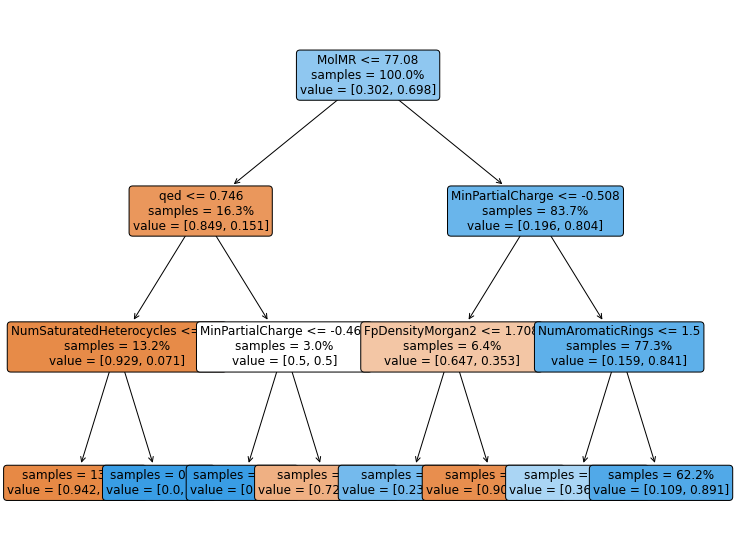

In [ ]:
performExperiment((X_train, y_train), (X_test, y_test), max_depth=3, feature_names=f.columns[1:-1], binary=True)

## Support Vector Machines


## Intuitive introduction to SVMs:

![SVM](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

SVMs are an iterative approach of trying to find the optimal hyperplane that divides the multidimentional space into different classes present in the dataset.


**Hyperplanes:** These are the decision planes that separate the objects of classes that we are trying to classify.

**Support Vectors** : Support vectors are the points from dataset that are closest to the hyperplane that divides the dataset.

**Margin**:  The gap between the closest support vectors from the different class along the direction perpendicular to the hyperplane. Simply put, it is the sum of perpendicular distance of the support vector of each class to the hyperplane.

---

Let us try to fall back to the dataset that we started this module with and see how SVMs perform on the iris dataset

Accuracy of the decision tree on the test set: 

0.921


The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


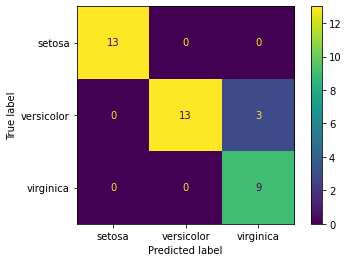

In [ ]:
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
class_names = iris["target_names"]
print("The confusion matrix is : ")
plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names)

Now lets again try to see how does SVM perform when we give it just two of the features from the dataset

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


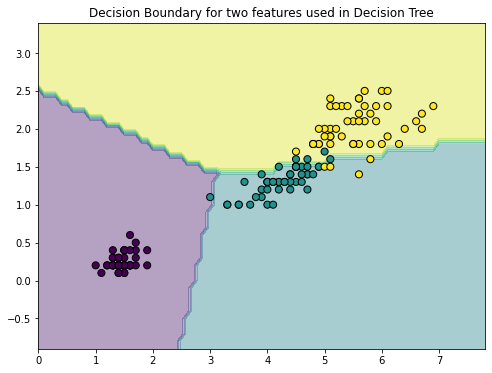

In [ ]:
clf = svm.LinearSVC()
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

## Logistic Regression

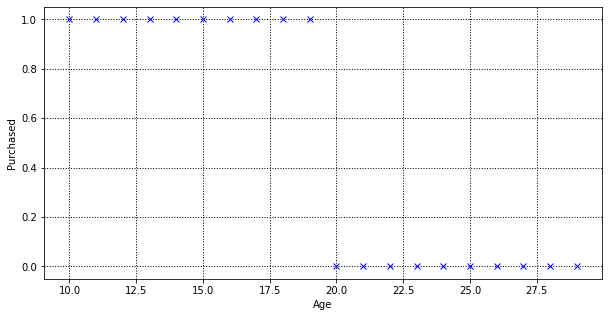

In [ ]:
x = np.array([i for i in range(10,30)])
y = np.concatenate([np.ones(10), np.zeros(10)])

fig = plt.figure(figsize=(10,5))
xlabel = 'Age'
ylabel = 'Purchased'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(color='k', linestyle=':', linewidth=1)
_ = plt.plot(x, y, 'xb')

Suppose we have some product, and we collected data on the relationship between the age of a customer, and whether they purchased the item or not. Customers aged between 10 and 19 made the purchase (purchased=1), whereas those customers above the age of 19 did not (purchased=0).

\

Now, let's try and fit linear regression and logistic regression models to this data, and test it.



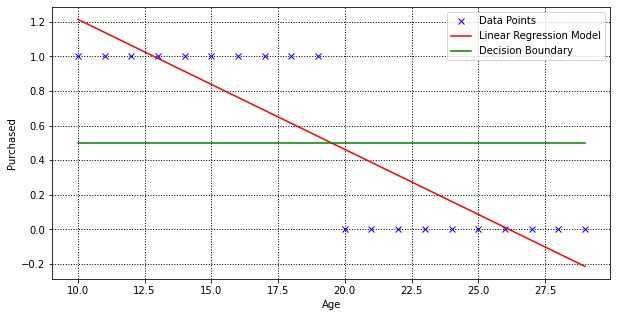

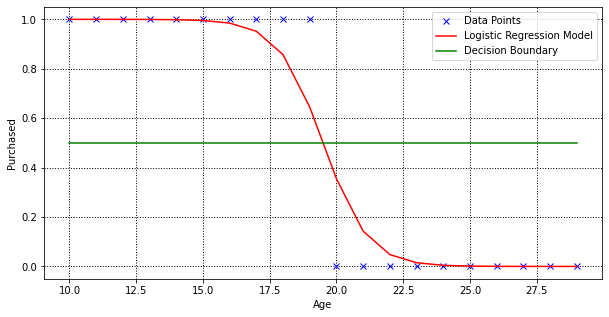

In [ ]:
def logistic_regression(x,y):

  log_regression = LogisticRegression()

  log_regression.fit(pd.DataFrame(x), y)

  y_pred = log_regression.predict_proba(pd.DataFrame(x))
  log_y_pred_1 = [item[1] for item in y_pred]

  line_point_5 = x * 0 + .5

  fig = plt.figure(figsize=(10,5))
  xlabel = 'Age'
  ylabel = 'Purchased'
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.grid(color='k', linestyle=':', linewidth=1)
  plt.plot(x, y, 'xb')
  plt.plot(x, log_y_pred_1, '-r')
  plt.plot(x, line_point_5,'-g')
  plt.legend(["Data Points","Logistic Regression Model","Decision Boundary"])
  plt.show()

  return log_regression


log_regression = logistic_regression(x,y)